In [1]:
# imports

import sys
import re
import pandas as pd
import numpy as np
import gensim
import nltk
from nltk.tokenize import word_tokenize
from gensim.utils import tokenize
from gensim.parsing.preprocessing import (
    strip_multiple_whitespaces,
    strip_non_alphanum,
    strip_punctuation2,
    strip_short)
from textpp_ptbr.preprocessing import TextPreProcessing as tpp
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from preprocessing import (
    clean_text,
    preprocess,
    tokenize)
from text_statistics import (
    number_tokens,
    tokens_length,
    unique_tokens,
    count_numbers,
    number_stopwords,
    print_statistics)
import seaborn as sns
sns.set_style("white")

In [8]:
def plot_histogram(x_axis, bins, x_label, y_label, figname, title=None, log=False, histtype='bar'):

    fig, (axis1) = plt.subplots(figsize=(10,8))

    plt.hist(x_axis, histtype=histtype, align='mid', orientation='vertical',
            color='royalblue', edgecolor='black', linewidth=0.4, bins=bins,
            log=log, lw=0.5)

    if log:
        axis1.set_yscale('log')
        axis1.set_xscale('log')

    if title != None:
        plt.title(title, fontsize=20, weight='bold')

    axis1.set_xlabel(x_label, fontsize=20, weight='bold')
    axis1.set_ylabel(y_label, fontsize=20, weight='bold')
    plt.grid(False)

    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)

#     plt.savefig(figname)
    plt.show()
    plt.clf()


In [13]:
file = './dados/itens_pregao_pitem_saude_subareas.csv'
data = pd.read_csv(file, sep=';')

data.info()
items = list(data['nom_item'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612689 entries, 0 to 3612688
Data columns (total 12 columns):
seq_dim_licitacao          int64
num_exercicio              int64
nom_entidade               object
seq_dim_item               int64
nom_item                   object
dsc_unidade_medida         object
nom_item_busca             object
vlr_quantidade             float64
vlr_unitario_homologado    float64
nom_funcao                 object
nom_subfuncao              object
vlr_licitacao              float64
dtypes: float64(3), int64(3), object(6)
memory usage: 330.8+ MB


In [14]:
temp = list(data[data['vlr_unitario_homologado'] >= 1000000]['nom_item'])
print(temp)

['TABELA REVISTA SIMPRO - MATERIAIS HOSPITALARES DE "A A Z", DESCRITOS NA REVISTA SIMPRO HOSPITALAR (EDICAO VIGENTE).', 'TABELA CMED - MEDICAMENTOS SIMILARES DE "A" a "Z" COM DESCONTO DE 36,29%  CONFORME A ATA DE REGISTRO DE PRECOS 054/2017  PREGAO 016/2017 DE CONTAGEM/MG.', 'TABELA CMED - MEDICAMENTOS GENERICOS DE "A" a "Z" COM DESCONTO DE 50,80%  CONFORME A ATA DE REGISTRO DE PRECOS 054/2017  PREGAO 016/2017 DE CONTAGEM/MG.', 'TABELA CMED - MEDICAMENTOS ETICOS DE "A" a "Z"  COM DESCONTO DE 1,67%  CONFORME A ATA DE REGISTRO DE PRECOS 0104/2017  PREGAO 000127/2017 DA SECRETARIA MUNICIPAL DE SAUDE DE GOVERNADOR VALADARES/MG.', 'TABELA CMED - MEDICAMENTOS SIMILARES DE "A" a "Z"  COM DESCONTO DE 33,55%  CONFORME A ATA DE REGISTRO DE PRECOS 0104/2017  PREGAO 000127/2017 DA SECRETARIA MUNICIPAL DE SAUDE DE GOVERNADOR VALADARES/MG.', 'TABELA CMED - MEDICAMENTOS GENERICOS DE "A" a "Z"  COM DESCONTO DE 41,94%  CONFORME A ATA DE REGISTRO DE PRECOS 0104/2017  PREGAO 000127/2017 DA SECRETARIA MUN

In [15]:
temp_df = data.loc[data['vlr_unitario_homologado'] == 0]
print(len(temp_df))
for x, y in zip(list(temp_df['vlr_licitacao']), list(temp_df['nom_item'])):
    if (x == 0):
        print(x, y)

624
0.0 FICHA DE ATENDIMENTO ODONTOLÓGICO INDIVIDUAL E-SUS FORMATO 8 AP 75 DUAS CHAPAS 100X1
0.0 FICHA DE ATENDIMENTO ODONTOLÓGICO INDIVIDUAL E-SUS FORMATO 8 AP 75 DUAS CHAPAS 100X1
0.0 FICHA DE ATENDIMENTO ODONTOLÓGICO INDIVIDUAL E-SUS FORMATO 8 AP 75 DUAS CHAPAS 100X1
0.0 FICHA DE ATENDIMENTO ODONTOLÓGICO INDIVIDUAL E-SUS FORMATO 8 AP 75 DUAS CHAPAS 100X1
0.0 HISTÓRICO ESCOLAR F/V  AP 180 F9
0.0 HISTÓRICO ESCOLAR F/V  AP 180 F9
0.0 HISTÓRICO ESCOLAR F/V  AP 180 F9
0.0 HISTÓRICO ESCOLAR F/V  AP 180 F9
0.0 ACOLHIMENTO/TRIAGEM FORMATO 24 AP 56 UMA CHAPA  - 100X1
0.0 ACOLHIMENTO/TRIAGEM FORMATO 24 AP 56 UMA CHAPA  - 100X1
0.0 ACOLHIMENTO/TRIAGEM FORMATO 24 AP 56 UMA CHAPA  - 100X1
0.0 ACOLHIMENTO/TRIAGEM FORMATO 24 AP 56 UMA CHAPA  - 100X1
0.0 ADESIVO DE AMOTOLIA 8CM POR 3,5CM 4 X 4
0.0 ADESIVO DE AMOTOLIA 8CM POR 3,5CM 4 X 4
0.0 ADESIVO DE AMOTOLIA 8CM POR 3,5CM 4 X 4
0.0 ADESIVO DE AMOTOLIA 8CM POR 3,5CM 4 X 4
0.0 ADESIVOS 20 X 30
0.0 ADESIVOS 20 X 30
0.0 ADESIVOS 20 X 30
0.0 ADESIVOS 

0.0 FICHA DE AVALIAÇÃO ORTOPÉDICA - FORMATO 8 AP 75 DUAS CHAPAS 100X1
0.0 FICHA DE AVALIAÇÃO ORTOPÉDICA - FORMATO 8 AP 75 DUAS CHAPAS 100X1
0.0 FICHA DE AVALIAÇÃO ORTOPÉDICA - FORMATO 8 AP 75 DUAS CHAPAS 100X1
0.0 FICHA DE CONTROLE DE SAÍDA DE VEÍCULOS - FORMATO 8 AP 75 UMA CHAPA 100X1
0.0 FICHA DE CONTROLE DE SAÍDA DE VEÍCULOS - FORMATO 8 AP 75 UMA CHAPA 100X1
0.0 FICHA DE CONTROLE DE SAÍDA DE VEÍCULOS - FORMATO 8 AP 75 UMA CHAPA 100X1
0.0 FICHA DE CONTROLE DE SAÍDA DE VEÍCULOS - FORMATO 8 AP 75 UMA CHAPA 100X1
0.0 FICHA DE CONTROLE DE VISITA DOMICILIAR - FORMATO 8 AP 75 DUAS CHAPAS 100X1
0.0 FICHA DE CONTROLE DE VISITA DOMICILIAR - FORMATO 8 AP 75 DUAS CHAPAS 100X1
0.0 FICHA DE CONTROLE DE VISITA DOMICILIAR - FORMATO 8 AP 75 DUAS CHAPAS 100X1
0.0 FICHA DE CONTROLE DE VISITA DOMICILIAR - FORMATO 8 AP 75 DUAS CHAPAS 100X1
0.0 FICHA DE EVOLUÇÃO - FORMATO 9 AP 75 DUAS CHAPAS 100X1
0.0 FICHA DE EVOLUÇÃO - FORMATO 9 AP 75 DUAS CHAPAS 100X1
0.0 FICHA DE EVOLUÇÃO - FORMATO 9 AP 75 DUAS CHAPA

In [16]:
data = data.dropna(subset=['nom_subfuncao'])

In [17]:
def count_plot(label, data, x_label, y_label):

    fig, (axis1) = plt.subplots(figsize=(12,8))

    sns.countplot(y=label, data=data, color='dodgerblue', order=data[label].value_counts().index)

    axis1.set_xlabel(x_label, fontsize=20, weight='bold')
    axis1.set_ylabel(y_label, fontsize=20, weight='bold')
    plt.grid(False)

    total = len(data)
    for p in axis1.patches:
        width = p.get_width()
        axis1.text(width, p.get_y()+0.5, '(%d) %.2f%%'%(width, 100*float(width)/total), fontsize=15)
#         axis1.text(width, p.get_y()+0.4, '%.2f%%'%(100*float(width)/total), fontsize=15)

    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)

    plt.show()
    plt.clf()

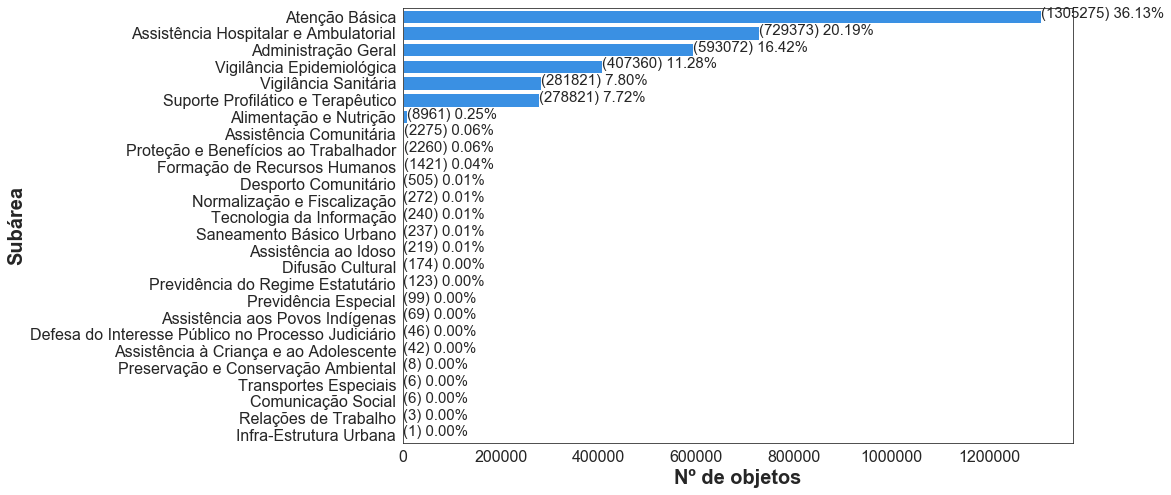

<Figure size 432x288 with 0 Axes>

In [18]:
count_plot("nom_subfuncao", data, "Nº de objetos", "Subárea")

In [19]:
len(set(data['nom_subfuncao'].values))

26

In [20]:
# delete all rows for which column 'Age' has value greater than 30 and Country is India 
indexNames = data[ (data['nom_subfuncao'] == 'Infra-Estrutura Urbana') |
                   (data['nom_subfuncao'] == 'Formação de Recursos Humanos') |
                   (data['nom_subfuncao'] == 'Assistência ao Idoso') |
                   (data['nom_subfuncao'] == 'Assistência à Criança e ao Adolescente') |
                   (data['nom_subfuncao'] == 'Ação Judiciária ') |
                   (data['nom_subfuncao'] == 'Normalização e Fiscalização') |
                   (data['nom_subfuncao'] == 'Planejamento e Orçamento') |
                   (data['nom_subfuncao'] == 'Assistência aos Povos Indígenas') |
                   (data['nom_subfuncao'] == 'Proteção e Benefícios ao Trabalhador') |
                   (data['nom_subfuncao'] == 'Preservação e Conservação Ambiental') |
                   (data['nom_subfuncao'] == 'Administração Financeira') |
                   (data['nom_subfuncao'] == 'Alimentação e Nutrição') |
                   (data['nom_subfuncao'] == 'Assistência Comunitária') |
                   (data['nom_subfuncao'] == 'Comunicação Social') |
                   (data['nom_subfuncao'] == 'Defesa do Interesse Público no Processo Judiciário') |
                   (data['nom_subfuncao'] == 'Desporto Comunitário') |
                   (data['nom_subfuncao'] == 'Difusão Cultural') |
                   (data['nom_subfuncao'] == 'Previdência Especial') |
                   (data['nom_subfuncao'] == 'Tecnologia da Informação') |
                   (data['nom_subfuncao'] == 'Saneamento Básico Urbano') |
                   (data['nom_subfuncao'] == 'Previdência do Regime Estatutário') |
                   (data['nom_subfuncao'] == 'Transportes Especiais') |
                   (data['nom_subfuncao'] == 'Relações de Trabalho')
                 ].index
 
newdata = data.drop(indexNames)

In [21]:
set(newdata['nom_subfuncao'].values)

{'Administração Geral',
 'Assistência Hospitalar e Ambulatorial',
 'Atenção Básica',
 'Suporte Profilático e Terapêutico',
 'Vigilância Epidemiológica',
 'Vigilância Sanitária'}

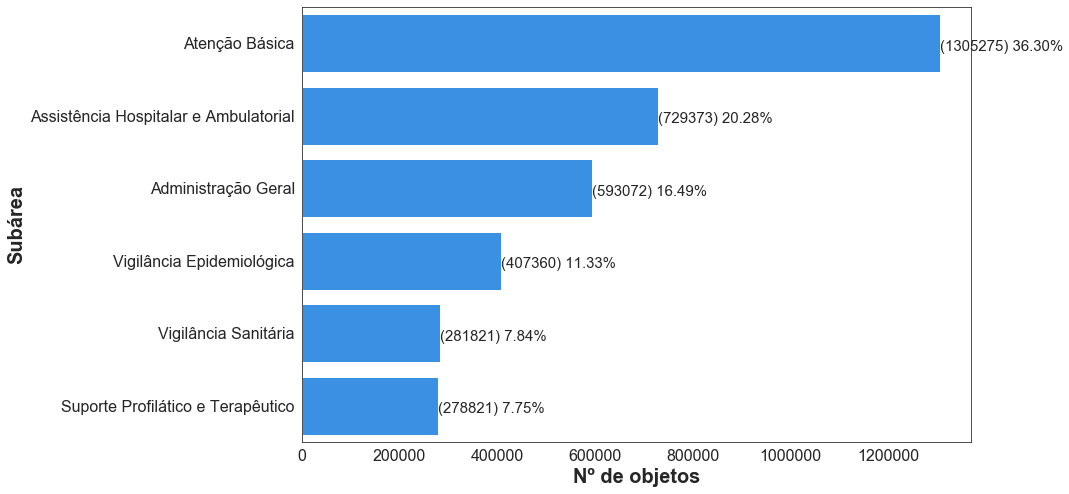

<Figure size 432x288 with 0 Axes>

In [22]:
count_plot("nom_subfuncao", newdata, "Nº de objetos", "Subárea")

In [23]:
atencao_basica = list(data[data['nom_subfuncao'] == 'Atenção Básica']['nom_item'])
administracao_geral = list(data[data['nom_subfuncao'] == 'Administração Geral']['nom_item'])
asssistencia_hospitalar = list(data[data['nom_subfuncao'] == 'Assistência Hospitalar e Ambulatorial']['nom_item'])
vigilancia_epid = list(data[data['nom_subfuncao'] == 'Vigilância Epidemiológica']['nom_item'])
vigilancia_san = list(data[data['nom_subfuncao'] == 'Vigilância Sanitária']['nom_item'])
suporte_profilatico = list(data[data['nom_subfuncao'] == 'Suporte Profilático e Terapêutico']['nom_item'])

In [24]:
atencao_basica_p = preprocess(atencao_basica, False)
administracao_geral_p = preprocess(administracao_geral, False)
assistencia_hospitalar_p = preprocess(asssistencia_hospitalar, False)
vigilancia_epid_p = preprocess(vigilancia_epid, False)
vigilancia_san_p = preprocess(vigilancia_san, False)
suporte_profilatico_p = preprocess(suporte_profilatico, False)

AAS 100 MILIGRAMAS
aas 100 miligramas
ACEBROFILINA XAROPE INFANTIL FRASCO COM 120ML
acebrofilina xarope infantil frasco 120 ml 
ACIDO ACETILSALICILICO 500 MILIGRAMAS
acido acetilsalicilico 500 miligramas
ALPAZOLAM 1 MILIGRAMA
alpazolam 1 miligrama
ALPRAZOLAM 05 MILIGRAMAS
alprazolam 5 miligramas
AMIODARONA 100 MILIGRAMAS
amiodarona 100 miligramas
ANLODIPINO 2 5 MILIGRAMAS
anlodipino 2 5 miligramas
ANLODIPINO 5 MILIGRAMAS
anlodipino 5 miligramas
BISOPROLOL 5 MILIGRAMAS
bisoprolol 5 miligramas
BRIMATOPROSTA MALEATO DE TIMOLOL 3 MILILITROS
brimatoprosta maleato timolol 3 mililitros
BROMAZEPAM 3 MILIGRAMAS
bromazepam 3 miligramas
BUDESONIDA 50 MCG - DOSE NAZAL
budesonida 50 mcg dose nazal
CARBONATO DE LITIO 450 MILIGRAMAS
carbonato litio 450 miligramas
CARVEDILOL 3 125 MILIGRAMAS
carvedilol 3 125 miligramas
CEFITRIAXONA 1 GRAMA
cefitriaxona 1 grama
CILOSTAZOL 50 MILIGRAMAS
cilostazol 50 miligramas
CIPROFIBRATO 100 MILIGRAMAS
ciprofibrato 100 miligramas
CLOMIPRAMINA 75 MILIGRAMAS
clomiprami

GRAMPEADOR METALICO COMP  37 5CM  GRAMPEIA ATE 20 FOLHAS
grampeador metalico comp 37 5 cm grampeia ate 20 folhas
FOLHA DE ISOPOR 15MM
folha isopor 15 mm 
ESTOJO DE CANETINHA HIDROCOR COLORIDA C  12 UNID
estojo canetinha hidrocor colorida c 12 unid
CRACHA C  PRENDEDOR
cracha c prendedor
MESA DE PING PONG DOBRAVEL OFICIAL 12MM  TAMPO EM MDP 12MM  ESTRUTURA DOS PES ARTICULADOS EM MADEIRA DOBRAVEL 15X274X76CM
mesa ping pong dobravel oficial 12 mm tampo mdp 12 mm estrutura pes articulados madeira dobravel 15 x 274 x 76 cm 
JOGO PEGA VARETAS COM 32 VARETAS
jogo pega varetas 32 varetas
JOGO DE XADREZ ESCOLAR  ESTOJO DE MADEIRA C  PECAS PLASTICAS  26X4  5X13CM
jogo xadrez escolar estojo madeira c pecas plasticas 26 x 4 5 x 13 cm 
GRAMPO TRILHO PLASTICO ESTENDIDO  BRANCO  300X9X112  PCT C 50 UNID
grampo trilho plastico estendido branco 300 x 9 x 112 pct c 50 unid
GRAMPO PLASTICO ESTENDIDO EM PROLIPROPILENO BRANCO  CAPACIDADE ATE 600 FLS
grampo plastico estendido prolipropileno branco capacidade

CAMERA FOTOGRAFICA DIGITAL 16.1MP,LCD 2,7,
camera fotografica digital 16 1 mp lcd 2 7 
IMPRESSORA LASER HL-2130
impressora laser hl 2130
MAQUINA COPIADORA LASER A3 15 PPM
maquina copiadora laser 15 ppm
GELADEIRA REFRIGERADOR 1 PORTA 236 LITROS.
geladeira refrigerador 1 porta 236 litros 
PURIFICADOR DE ÁGUA ELÉTRICO.
purificador agua eletrico 
LONGARINA com 4 assentos
longarina 4 assentos
TRITURADOR DE PAPEL
triturador papel
BAIA PARA CALL CENTER  com pés em aço anatômico.
baia call center pes aco anatomico 
COMPUTADOR CORE I3 HD 500, TELA DE 18,5 POLEGADAS.
computador core hd 500 tela 18 5 polegadas 
NOTEBOOK,
notebook 
REFRIGERADOR / GELADEIRA 2 PORTAS 345 LITROS
refrigerador geladeira 2 portas 345 litros
NOBREACK.
nobreack 
FOGÃO INDUSTRIAL A GÁS 2 TREPES,
fogao industrial gas 2 trepes 
VENTILADOR DE COLUNA DE 60 CM
ventilador coluna 60 cm
GELADEIRA /REFRIGERADOR DUPLEX  334 LITROS
geladeira refrigerador duplex 334 litros
MESA PARA COZINHA COM 6 CADEIRAS medindo 150X75 ,
mesa cozinha

MAPA DE APLICAÇÃO DE FLUOR
mapa aplicacao fluor
LEVANTAMENTO EPIDEMIOLÓGICO
levantamento epidemiologico
LAUDO PARA SOLICITAÇÃO, AUTORIZAÇÃO OU PROCEDIMENTO AMBULATÓRIO
laudo solicitacao autorizacao procedimento ambulatorio
LAUDO DO SUSFÁCIL-AIH-SOLICITAÇÃO DE INTERNAÇÃO/TRANSFERENCIA
laudo susfacil aih solicitacao internacao transferencia
FICHA DE VISITAS DOMICILIARES COM DGITAL
ficha visitas domiciliares dgital
FICHA PSF-ASSIST. MÉDICA E SANITÁRIA
ficha psf assist medica sanitaria
FICHA INDIVIDUAL DA FAMILIA MODELO I
ficha individual familia modelo i
FICHA DE VACINAÇÃO
ficha vacinacao
FICHA DE VACINA
ficha vacina
FICHA DE REGISTRO GESTANTE SISPRENATAL
ficha registro gestante sisprenatal
FICHA DE ESCOVAÇÃO SUPERVISIONADA
ficha escovacao supervisionada
FICHA DE ALTERAÇÃO
ficha alteracao
FICHA D
ficha d
FICHA CLINICA ODONTOLOGICA
ficha clinica odontologica
FICHA CADASTRAMENTO DE GESTANTE
ficha cadastramento gestante
FICHA CADASTRAL DE DIABETES
ficha cadastral diabetes
FICHA B-TB-ACOMP. T

metros vidros temperados 8 10 mm 
Carne Bovina  de primeira sem osso e sem gordura
carne bovina primeira osso gordura
AMENDOIN PACOTE DE 1KG
amendoin pacote 1 kg 
SUCO EM POLPA.
suco polpa 
SUCO ARTIFICIAL EM PÓ,
suco artificial po 
PIRULITO SORTIDO,
pirulito sortido 
PÃO TIPO ROSCA,
pao tipo rosca 
PÃO DE QUEIJO,
pao queijo 
MILHO PARA PIPOCA PACOTE COM 500 G
milho pipoca pacote 500 g
COCO RALADO EM PACOTE DE 1 kg
coco ralado pacote 1 kg
CALDEIRÃO 20L
caldeirao 20 l 
PORTA SABONETE LIQUIDO
porta sabonete liquido
CANECA CERAMICA PARA ALUNO
caneca ceramica aluno
BACIA DE ALUMINIO PEQUENA
bacia aluminio pequena
BACIA DE ALUMINIO MEDIA
bacia aluminio media
BACIA DE ALUMINIO GRANDE
bacia aluminio grande
VITAMINA DE CAIXINHA.
vitamina caixinha 
BATATA PALHA 1 KG.
batata palha 1 kg 
ALMOTOLIA 250ML
almotolia 250 ml 
INSETICIDA MULTI INSETOS 300ML
inseticida multi insetos 300 ml 
BACIA DE PLÁSTICO 9 LITROS
bacia plastico 9 litros
CONCHA ALUMINIO.
concha aluminio 
BALDE COM TAMPA 50L
balde tam

FILTRO PH 520
filtro ph 520
FILTRO PH 1960
filtro ph 1960
FILTRO PS 2/255
filtro ps 2 255
FILTRO PS 2/155
filtro ps 2 155
FILTRO GI 41
filtro gi 41
FILTRO GI 40/7
filtro gi 40 7
FILTRO GI 07/1
filtro gi 7 1
FILTRO GI 04/7
filtro gi 4 7
FILTRO GI 03/1
filtro gi 3 1
FILTRO GI 02/1
filtro gi 2 1
FILTRO FC 165
filtro fc 165
FILTRO FC164
filtro 
FILTRO AS 820
filtro 820
FILTRO AS 810
filtro 810
FILTRO AS 805
filtro 805
FILTRO AS 266
filtro 266
FILTRO ARL 9603
filtro arl 9603
FILTRO ARL 4150
filtro arl 4150
FILTRO FBD
filtro fbd
FILTRO FBO 493
filtro fbo 493
FILTRO PSC 455
filtro psc 455
FILTRO PSC 493
filtro psc 493
FILTRO PSL 655
filtro psl 655
FILTRO WO 331
filtro wo 331
TECLADO MOD 0303 PRETO
teclado mod 3 03 preto
CAIXA DE SOM AMPLIFICADA  com entrada de USB
caixa som amplificada entrada usb
MOUSE OTICO PRETO
mouse otico preto
FOGÃO INDUSTRIAL COM 4 BOCAS
fogao industrial 4 bocas
MOUSE
mouse
ESTABILIZADOR
estabilizador
LAMPADA INFRA VERMELHO
lampada infra vermelho
TATAME DIVA TABLADO CO

PRESTAÇÃO DE SERVIÇOS DE MANUTENÇÃO PRENTIVA E CORRETIVA EM EQUIPAMENTOS DA AREA ODONTOLOGICA DA PMAF
prestacao servicos manutencao prentiva corretiva equipamentos area odontologica pmaf
FOCO DE LUZ CLINICO E GINECOLOGICO
foco luz clinico ginecologico
IMPRESSORA, COM AS SEGUINTES CARACTERÍSTICAS MÍNIMAS:  FUNÇÕES PADRÃO IMPRESSÃO, CÓPIA, DIGITALIZAÇÃO OPCIONAL IMPRESSÃO MÓVEL, ECO MODE PROCESSADOR 600 MHZ PAINEL
impressora seguintes caracteristicas minimas funcoes padrao impressao copia digitalizacao opcional impressao movel eco mode processador 600 mhz painel
ARQUIVO DE AÇO MISTO, COM AS SEGUINTES CARACTERÍSTICAS MÍNIMAS:  ARQUIVO EM AÇO COM 03 GAVETAS PARA PASTA SUSPENSA TAMANHO OFÍCIO E 2 GAVETAS
arquivo aco misto seguintes caracteristicas minimas arquivo aco 3 gavetas pasta suspensa tamanho oficio 2 gavetas
BRACADEIRA PARA INJECAO COM AS SEGUINTES CARACTERISTICAS MINIMAS:CONSTRUIDA EM TRIPE METALON 25X25  ESTRUTURA EM TUBO DE ACO 7 8 E TUBOS PINTADOS   HASTE EM TUBO 3 4 CROMADO   C

arame farpado 250 mts 
Arame farpado 400Mts
arame farpado 400 mts 
Fio Flexivel 2,50mm²
fio flexivel 2 50 mm 2
Arla 32
arla 32
Òleo de transmissão 10 W 30, balde 20 litros
oleo transmissao 10 w 30 balde 20 litros
Graxa Rolamento - 20 Kg
graxa rolamento 20 kg
Graxa Chassi - 20 Kg
graxa chassi 20 kg
Aditivo Flex
aditivo flex
Aditivo Gasolina
aditivo gasolina
Aditivo diesel
aditivo diesel
Òleo SAE 140, balde 20 litros
oleo sae 140 balde 20 litros
Òleo SAE 140, litro
oleo sae 140 litro
Òleo SAE 90, balde 20 litros
oleo sae 90 balde 20 litros
Òleo SAE 90, litro
oleo sae 90 litro
Òleo SAE 80, Balde 20 litros
oleo sae 80 balde 20 litros
Òleo SAE 80, litro
oleo sae 80 litro
Òleo 40 LA 3 diesel - Balde 20 litros
oleo 40 la 3 diesel balde 20 litros
Òleo 40 LA 3 diesel - litro
oleo 40 la 3 diesel litro
Òleo 20 W 50 4 Tempos
oleo 20 w 50 4 tempos
Òleo 10 W 40 Flex Semi Sintético
oleo 10 w 40 flex semi sintetico
Óleo 5 W 40 Flex Sintético
oleo 5 w 40 flex sintetico
Fluido de freio dot 4, unidade co

ACAB. VALV. HYDRA CROMADO
acab valv hydra cromado
REDUCAO ESG. EXC. 150*100
reducao esg exc 150 100
TAMPA GALV. ROSCA INT. 1/2
tampa galv rosca int 1 2
REPARO HYDRA MAX ORIGINAL
reparo hydra max original
VALVULA RETENCAO ESG.DN100 30
valvula retencao esg 30
REGISTRO ESFERA 50MM VS SOLD
registro esfera 50 mm vs sold
BUCHA SOLD. RED LONGA 50*32
bucha sold red longa 50 32
MANGUEIRA CRISTAL 3/8*1.5
mangueira cristal 3 8 1 5
ENGATE PLASTICO 1/2*50
engate plastico 1 2 50
BUCHA SOLD. RED.LONGA 40*25MM
bucha sold red longa 40 25 mm 
KIT ACIONAMENTO COMPLETO VD 1
kit acionamento completo vd 1
ADAPTADOR INTERNO 3/4
adaptador interno 3 4
TORNEIRA PARA TANQUE
torneira tanque
TORNEIRA DE JARDIM 1/2 1128
torneira jardim 1 2 1128
REGISTRO ESFERA 3
registro esfera 3
SIFAO CINZA
sifao cinza
VALVULA PLASTICO PIA BR
valvula plastico pia br
PIA 150*55 SINTETICA TR
pia 150 55 sintetica tr
REPARO HYDRA
reparo hydra
VALVULA TANQUE 1 1/2 N9
valvula tanque 1 1 2 
TANQUE SINT. DUPLO
tanque sint duplo
VALVULA DE

MAPA DE PRODUCAO MENSAL 100*1
mapa producao mensal 100 1
FICHA DE LEVANT. ODONTO 100*1
ficha levant odonto 100 1
CONTROLE DIARIO DE ATIV. 100*1
controle diario ativ 100 1
RELATORIO PMA2-C 100*1
relatorio c 100 1
PSICOLOGO RETORNO
psicologo retorno
LAUDO SOLIC.PROCED.AMBUL.100*1
laudo solic proced ambul 100 1
CADASTRO HIPERT.E/OU DIAB.50*2
cadastro hipert diab 50 2
SISVAN-MAPA ACOMP.NUTRIC.100*1
sisvan mapa acomp nutric 100 1
CONTR. COLETA EXAMES LAB.100*1
contr coleta exames lab 100 1
REQ.EXAME CIPAT.C. UTERO 100*1
req exame cipat c utero 100 1
REQUISICAO DE MAMOGRAFIA 100*1
requisicao mamografia 100 1
RELATORIO SSA2 100*2
relatorio 100 2
FORM. ENC. ESPEC. MEDICAS 50*2
form enc espec medicas 50 2
ATESTADO SAUDE PAPEL SB 100*1V
atestado saude papel sb 100 1 v 
CADSTRO UNICO DE ALUNO 100*1
cadstro unico aluno 100 1
REQUIS. AO ALMOXARIFADO 50*2V
requis almoxarifado 50 2 v 
AUTORIZO FORNECER 50*2VIAS
autorizo fornecer 50 2 vias 
BOLETIM TR.ANTI-VETORIAL 100*1
boletim tr anti vetorial 100 1

papel contact
CALCULADORA DE BOLSO
calculadora bolso
REGUA PLASTICA 30 CM
regua plastica 30 cm
LAPIS BORRACHA
lapis borracha
COLA BASTAO
cola bastao
GRAFITE 0,5
grafite 0 5
LAPIS DE COR C/24 UNIDADES GR
lapis cor c 24 unidades gr
APONTADOR PARA LAPIS
apontador lapis
BORRACHA BRANCA N.20
borracha branca n 20
PEN DRIVE 16 GB
pen drive 16 gb
MASSA PARA MODELAR C/12
massa modelar c 12
LAPIS PRETO  N. 2
lapis preto n 2
FITA METRICA
fita metrica
PLACA DE ISOPOR 2CM
placa isopor 2 cm 
TINTA GUACHE 250ML
tinta guache 250 ml 
LAPISEIRA 0.5
lapiseira 0 5
CANETINHA C/ 12
canetinha c 12
FITA ADESIVA 45MM*50M
fita adesiva 45 mm 50 m 
PALITO PICOLE C/ 100 UN.
palito picole c 100 un 
PALITO P/ CHURRASCO
palito p churrasco
TESOURA
tesoura
PISTOLA COLA QUENTE BASTAO 7.2
pistola cola quente bastao 7 2
CAIXA EM MDF MEDINDO 15*15CM
caixa mdf medindo 15 15 cm 
CLIP GALVANIZADO N.02 C/500GR
clip galvanizado n 2 c 500 gr 
TESOURA PARA PICOTAR
tesoura picotar
BASTAO COLA QUENTE FINO C/50
bastao cola quente fi

LEVODOPA+BENSERAZ.200/50MG CPR
levodopa benseraz 200 50 mg cpr
LEVODOPA+BENSERAZ.100/25MG CPR
levodopa benseraz 100 25 mg cpr
INSULINA GLARGINA 3ML
insulina glargina 3 ml 
IBUPROFENO 600MG CPR
ibuprofeno 600 mg cpr
HALOPERIDOL S.ORAL 2MG/ML 20ML
haloperidol s oral 2 mg ml 20 ml 
GLICLAZIDA 30MG COMPRIMIDO
gliclazida 30 mg comprimido
FENOBARBITAL 40MG/ML 20ML
fenobarbital 40 mg ml 20 ml 
ENANT.NOREST.+VALERATO ESTRAD.
enant norest valerato estrad 
DINITRATO ISOSSORBIDA 5MG  CPR
dinitrato isossorbida 5 mg cpr
DEXCLORFENIRAMINA2MG/5ML 100ML
 dexclorfeniramina 2 mg 5 ml 100 ml 
DEXCLORFENIRAMINA 2 MG CPR
dexclorfeniramina 2 mg cpr
DEXAMETASONA COLIRIO 1% 5 ML
dexametasona colirio 1 5 ml
CLORETO DE SODIO 30MG/ML 30ML
cloreto sodio 30 mg ml 30 ml 
CLORETO DE SODIO 9MG/ML 30 ML
cloreto sodio 9 mg ml 30 ml
CLONAZEPAM 2.5MG/ML 20ML
clonazepam 2 5 mg ml 20 ml 
CIPROT.+ETNILEST.2MG+0.035 CPR
ciprot etnilest 2 mg 0 35 cpr
CIPROFLOXACINO 500MG CPR
ciprofloxacino 500 mg cpr
CETOCONAZOL CREME C/ 30GR

ATADURA CREPE 15CM
atadura crepe 15 cm 
ALMOTOLIA TRANSPARENTE 250ML
almotolia transparente 250 ml 
BROMIDRATO FENETEROL 20ML
bromidrato feneterol 20 ml 
SULFADIAZINA DE PRATA 1% 400GR
sulfadiazina prata 1 400 gr 
SERINGA 10ML S/AG
seringa 10 ml s ag
ESPECULO VAGINAL "G"
especulo vaginal g 
LANTERNA CLINICA
lanterna clinica
PRESERVATIVO SEM LUBRIFICACAO
preservativo lubrificacao
COMPRESSA DE GAZES 7.5 X 7.5
compressa gazes 7 5 x 7 5
FITA MICROPORE 25 MM * 10 M
fita micropore 25 mm 10 m
VASELINA SOLIDA  500GR
vaselina solida 500 gr 
ESPECULO VAGINAL P
especulo vaginal p
ESCOVA CERVICAL ESTERILIZADA
escova cervical esterilizada
ESPECULO VAGINAL M
especulo vaginal m
ABAIXADOR DE LINGUA C/ 100
abaixador lingua c 100
ATADURA CREPON 10CM
atadura crepon 10 cm 
ATADURA CREPON 6CM C/12
atadura crepon 6 cm c 12
ALGODAO HIDROFILO 500GR
algodao hidrofilo 500 gr 
ESPARADRAPOS 10 CM * 4.5 M
esparadrapos 10 cm 4 5 m
SERINGA DESC. 20 ML
seringa desc 20 ml
SERINGA 5 ML
seringa 5 ml
SERINGA 3 ML  S/AG
s

CEFALEXINA SUSP 250ML/5ML
cefalexina susp 250 ml 5 ml 
NEOMICINA+BACITRACINA POMADA
neomicina bacitracina pomada
DECANOATO DE HALOPERIDOL 50MG
decanoato haloperidol 50 mg 
SULFATO FERROSO GOTAS
sulfato ferroso gotas
SULFATO FERROSO 40MG DE FE ELE
sulfato ferroso 40 mg fe 
SUCCINATO DE METILA 52.5MG
succinato metila 52 5 mg 
SALICILATO DE METILA
salicilato metila
PREDNISOLONA 3MG/ML
prednisolona 3 mg ml
CLORIDRATO DE PROMETAZINA 25MG
cloridrato prometazina 25 mg 
CLORIDRATO DE LIDOCAINA 2% 30G
cloridrato lidocaina 2 30 g 
CLORIDRATO DE FENOTEROL 0,5%
cloridrato fenoterol 0 5 
CLORIDRATO  CLORPROMAZINA 40MG
cloridrato clorpromazina 40 mg 
CLORIDRATO DE BROMEXIDINA  2MG
cloridrato bromexidina 2 mg 
RANITIDINA 150MG COMP.
ranitidina 150 mg comp 
PERMITRINA 10MG/ML LOCAO
permitrina 10 mg ml locao
SINVASTATINA 40MG CPR
sinvastatina 40 mg cpr
OMEPRAZOL 20MG CP
omeprazol 20 mg cp
METILDOPA 250 MG CPR
metildopa 250 mg cpr
METOCLOPRAMIDA 10MG CPR
metoclopramida 10 mg cpr
METILDOPA 500MG CPR
meti

ALOPURINOL 300MG COMPRIMIDO
alopurinol 300 mg comprimido
SULFATO FERROSO GOTAS
sulfato ferroso gotas
PREDNISOLONA 3MG/ML
prednisolona 3 mg ml
CLORIDRATO DE PROMETAZINA 25MG
cloridrato prometazina 25 mg 
NITROFURANTOINA 100MG
nitrofurantoina 100 mg 
METILDOPA 250 MG CPR
metildopa 250 mg cpr
METOCLOPRAMIDA 10MG CPR
metoclopramida 10 mg cpr
METILDOPA 500MG CPR
metildopa 500 mg cpr
LORATADINA XPE 3MG/ML 100ML
loratadina xpe 3 mg ml 100 ml 
LEVODOPA+BENSERAZ.100/25MG CPR
levodopa benseraz 100 25 mg cpr
IBUPROFENO 600MG CPR
ibuprofeno 600 mg cpr
GLICLAZIDA 30MG COMPRIMIDO
gliclazida 30 mg comprimido
FENOBARBITAL 40MG/ML 20ML
fenobarbital 40 mg ml 20 ml 
DINITRATO ISOSSORBIDA 5MG  CPR
dinitrato isossorbida 5 mg cpr
CARVEDILOL 12.5 MG CPR
carvedilol 12 5 mg cpr
CARVEDILOL 3.125MG CPR
carvedilol 3 125 mg cpr
BENZILPENICILINA 300.000UI+100
benzilpenicilina 300 000 ui 100
AZITROMICINA 40 MG/ML
azitromicina 40 mg ml
ALENDRONATO DE SODIO 70 MG CPR
alendronato sodio 70 mg cpr
CARBONATO DE LITIO 300M

ESPARADRAPO EM TECIDO DE ALGODAO, BRANCO, 10cm x 4,5 m, IMPERMEABILIZADO EM UMA DAS FACES E COM EXCELENTE MASSA ADESIVA NA OUTRA FACE. -ESPARADRAPO
esparadrapo tecido algodao branco 10 cm x 4 5 m impermeabilizado faces excelente massa adesiva outra face esparadrapo
GAZE, TECIDO 100% ALGODAO, 13 FIOS/CM2, COR BRANCA,ISENTA DE IMPUREZAS, 8 CAMADAS, 7,5 CM, 7,5 CM, 5DOBRAS, DESCARTAVEL PCT 500 UNIDADES
gaze tecido 100 algodao 13 fios cor branca isenta impurezas 8 camadas 7 5 cm 7 5 cm 5 dobras descartavel pct 500 unidades
COLETOR DE MATERIAL PERFUROCORTANTE - CAPACIDADE VOLUMETRICA: 1,5 LITROS REVESTIMENTO: SUPORTE FUNCAO: DUPLO REVESTIMENTO INTERNO TAMPA: PARA PROTE
coletor material perfurocortante capacidade volumetrica 1 5 litros revestimento suporte funcao duplo revestimento interno tampa prote
ATADURA DE CREPOM- TAMANHO 15CM X 1,8M, CONTENDO 13 FIOS 2CM. CONFECCIONADA EM FIOS DE ALGODAO CRU OU COMPONENTES SINTETICOS COM AS BORDAS DELIMITADAS
atadura crepom tamanho 15 cm x 1 8 m conte

soro fisiologico caixa 24 unidades 1000 ml frasco
SORO FISIOLOGICO, CAIXA COM 24 UNIDADES DE 500ML EM FRASCO
soro fisiologico caixa 24 unidades 500 ml frasco
SORO FISIOLOGICO, CAIXA COM 24 UNIDADES DE 250ML. EM FRASCO
soro fisiologico caixa 24 unidades 250 ml frasco
SORO GLICOFISIOLOGICO CX COM 24 UNIDADES DE 500ML.
soro glicofisiologico cx 24 unidades 500 ml 
JELCO No 24
jelco 24
JELCO No 22
jelco 22
JELCO No 18
jelco 18
PAPEL GRAU CIRURGICO, P/UTILIZACAO EM AUTOCLAVE OU ETO COM UMA FACE EM PAPEL GRAU CIRUGICO E OUTRA EM FILME TRI-LAMINADO COM INDICADOR QUIMICO TIPO MU
papel grau cirurgico p utilizacao autoclave eto face papel grau cirugico outra filme tri laminado indicador quimico tipo mu
FITA MICROPORE BRANCA CARRETEL COM CAPA COM 50MM X 10MT
fita micropore branca carretel capa 50 mm x 10 mt 
FITA PARA AUTOCLAVE, TAMANHO 19 MM X 30M - EMBALAGEM COM 1 UNIDADE
fita autoclave tamanho 19 mm x 30 m embalagem 1 unidade
ALCOOL GEL ANTI-SEPTICO A BASE DE ALCOOL A 70% COM ACAO ANTI-SEPTICA,

In [25]:
atencao_basica_unique = unique_tokens(atencao_basica_p)
administracao_geral_unique = unique_tokens(administracao_geral_p)
assistencia_hospitalar_unique = unique_tokens(assistencia_hospitalar_p)
vigilancia_epid_unique = unique_tokens(vigilancia_epid_p)
vigilancia_san_unique = unique_tokens(vigilancia_san_p)
suporte_profilatico_unique = unique_tokens(suporte_profilatico_p)

In [26]:
print(len(atencao_basica_unique))
print(len(administracao_geral_unique))
print(len(assistencia_hospitalar_unique))
print(len(vigilancia_epid_unique))
print(len(vigilancia_san_unique))
print(len(suporte_profilatico_unique))

96434
63248
71314
51031
40009
38023


In [28]:
atencao_basica_nn = count_numbers(atencao_basica_p)
administracao_geral_nn = count_numbers(administracao_geral_p)
assistencia_hospitalar_nn = count_numbers(assistencia_hospitalar_p)
vigilancia_epid_nn = count_numbers(vigilancia_epid_p)
vigilancia_san_nn = count_numbers(vigilancia_san_p)
suporte_profilatico_nn = count_numbers(suporte_profilatico_p)

In [29]:
def get_completetext(documents):
    all_tokens = []

    for doc in documents:
        for t in doc:
            all_tokens.append(t)

    complete_text = ' '.join(all_tokens)

    return complete_text

In [30]:
atencao_basica_text = get_completetext(atencao_basica_p)
administracao_geral_text = get_completetext(administracao_geral_p)
assistencia_hospitalar_text = get_completetext(assistencia_hospitalar_p)
vigilancia_epid_text = get_completetext(vigilancia_epid_p)
vigilancia_san_text = get_completetext(vigilancia_san_p)
suporte_profilatico_text = get_completetext(suporte_profilatico_p)

In [31]:
def plot_wordcloud(text, collocations=False):

    fig, (axis1) = plt.subplots(figsize=(10,8))

    # Create and generate a word cloud image:
    wordcloud = WordCloud(width=800, height=800, background_color='white',
                          min_font_size=13, collocations=collocations).generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 4320x2880 with 0 Axes>

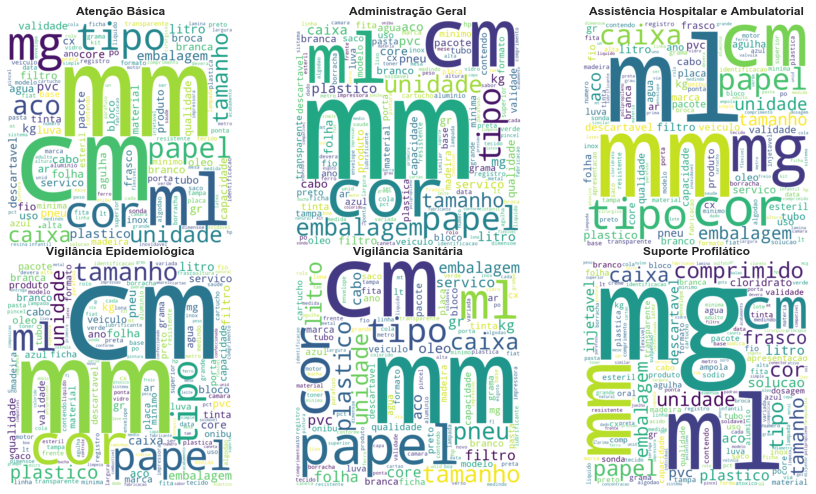

<Figure size 432x288 with 0 Axes>

In [32]:
plt.clf()
plt.figure(figsize=(60,40))
plt.subplots(figsize=(12,10))

plt.subplot(3,3,1)
wordcloud = WordCloud(width=800, height=800, background_color='white',
                          min_font_size=13, collocations=False).generate(atencao_basica_text)

plt.title("Atenção Básica", fontsize=12, weight='bold')
# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.subplot(3,3,2)
wordcloud = WordCloud(width=800, height=800, background_color='white',
                          min_font_size=13, collocations=False).generate(administracao_geral_text)

plt.title("Administração Geral", fontsize=12, weight='bold')
# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.subplot(3,3,3)
wordcloud = WordCloud(width=800, height=800, background_color='white',
                          min_font_size=13, collocations=False).generate(assistencia_hospitalar_text)

plt.title("Assistência Hospitalar e Ambulatorial", fontsize=12, weight='bold')
# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.subplot(3,3,4)
wordcloud = WordCloud(width=800, height=800, background_color='white',
                          min_font_size=13, collocations=False).generate(vigilancia_epid_text)

plt.title("Vigilância Epidemiológica", fontsize=12, weight='bold')
# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)


plt.subplot(3,3,5)
wordcloud = WordCloud(width=800, height=800, background_color='white',
                          min_font_size=13, collocations=False).generate(vigilancia_san_text)

plt.title("Vigilância Sanitária", fontsize=12, weight='bold')
# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.subplot(3,3,6)
wordcloud = WordCloud(width=800, height=800, background_color='white',
                          min_font_size=13, collocations=False).generate(suporte_profilatico_text)

plt.title("Suporte Profilático", fontsize=12, weight='bold')
# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)


plt.show()
plt.clf()

In [ ]:
plt.clf()
plt.figure(figsize=(60,40))
plt.subplots(figsize=(12,10))

plt.subplot(3,3,1)
wordcloud = WordCloud(width=800, height=800, background_color='white',
                          min_font_size=13, collocations=True).generate(atencao_basica_text)

plt.title("Atenção Básica", fontsize=12, weight='bold')
# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.subplot(3,3,2)
wordcloud = WordCloud(width=800, height=800, background_color='white',
                          min_font_size=13, collocations=True).generate(administracao_geral_text)

plt.title("Administração Geral", fontsize=12, weight='bold')
# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.subplot(3,3,3)
wordcloud = WordCloud(width=800, height=800, background_color='white',
                          min_font_size=13, collocations=True).generate(assistencia_hospitalar_text)

plt.title("Assistência Hospitalar e Ambulatorial", fontsize=12, weight='bold')
# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.subplot(3,3,4)
wordcloud = WordCloud(width=800, height=800, background_color='white',
                          min_font_size=13, collocations=True).generate(vigilancia_epid_text)

plt.title("Vigilância Epidemiológica", fontsize=12, weight='bold')
# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)


plt.subplot(3,3,5)
wordcloud = WordCloud(width=800, height=800, background_color='white',
                          min_font_size=13, collocations=True).generate(vigilancia_san_text)

plt.title("Vigilância Sanitária", fontsize=12, weight='bold')
# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.subplot(3,3,6)
wordcloud = WordCloud(width=800, height=800, background_color='white',
                          min_font_size=13, collocations=True).generate(suporte_profilatico_text)

plt.title("Suporte Profilático", fontsize=12, weight='bold')
# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)


plt.show()
plt.clf()

In [ ]:
item_distinct = newdata.drop_duplicates(['nom_item', 'nom_subfuncao']) 

In [ ]:
temp = data.drop_duplicates(['nom_item', 'nom_subfuncao']) 
len(temp)

In [ ]:
item_distinct.info()

In [ ]:
def box_plot(x, y, data, x_label, y_label):

    fig, (axis1) = plt.subplots(figsize=(10,6))

    sns.boxplot(y=y, x=x, data=item_subset)

    axis1.set_xlabel(x_label, fontsize=20, weight='bold')
    axis1.set_ylabel(y_label, fontsize=20, weight='bold')
    plt.grid(False)


    plt.yticks(fontsize=16, weight='bold')
    plt.xticks(fontsize=16, weight='bold')

    plt.show()
    plt.clf()

In [ ]:
plt.clf()
plt.figure(figsize=(50,30))
plt.subplots(figsize=(18,14))

y = "nom_subfuncao"
x = "vlr_unitario_homologado"
x_label = "Preço (R$)"
y_label = "Subárea"

axis1 = plt.subplot(2,3,1)
item_subset = item_distinct[(item_distinct['vlr_unitario_homologado'] > 0) & (item_distinct['vlr_unitario_homologado'] <= 1)]
sns.boxplot(y=y, x=x, data=item_subset)
plt.title("Entre 0.00 e 1.00", fontsize=16, weight='bold')
axis1.set_xlabel(x_label, fontsize=20, weight='bold')
axis1.set_ylabel(y_label, fontsize=20, weight='bold')
plt.grid(False)

plt.yticks(fontsize=16, weight='bold')
plt.xticks(fontsize=16, weight='bold')

axis1 = plt.subplot(2,3,3)
item_subset = item_distinct[(item_distinct['vlr_unitario_homologado'] > 1) & (item_distinct['vlr_unitario_homologado'] <= 5)]
sns.boxplot(y=y, x=x, data=item_subset)
plt.title("Entre 1.00 e 5.00", fontsize=16, weight='bold')
axis1.set_xlabel(x_label, fontsize=20, weight='bold')
axis1.set_ylabel(y_label, fontsize=20, weight='bold')
plt.grid(False)

plt.yticks(fontsize=16, weight='bold')
plt.xticks(fontsize=16, weight='bold')

axis1 = plt.subplot(2,3,4)
item_subset = item_distinct[(item_distinct['vlr_unitario_homologado'] > 5) & (item_distinct['vlr_unitario_homologado'] <= 10)]
sns.boxplot(y=y, x=x, data=item_subset)
plt.title("Entre 5.00 e 10.00", fontsize=16, weight='bold')
axis1.set_xlabel(x_label, fontsize=20, weight='bold')
axis1.set_ylabel(y_label, fontsize=20, weight='bold')
plt.grid(False)

plt.yticks(fontsize=16, weight='bold')
plt.xticks(fontsize=16, weight='bold')

axis1 = plt.subplot(2,3,6)
item_subset = item_distinct[(item_distinct['vlr_unitario_homologado'] > 10) & (item_distinct['vlr_unitario_homologado'] <= 100)]
sns.boxplot(y=y, x=x, data=item_subset)
plt.title("Entre 10.00 e 100.00", fontsize=16, weight='bold')
axis1.set_xlabel(x_label, fontsize=20, weight='bold')
axis1.set_ylabel(y_label, fontsize=20, weight='bold')
plt.grid(False)

plt.yticks(fontsize=16, weight='bold')
plt.xticks(fontsize=16, weight='bold')

# axis1 = plt.subplot(2,2,4)
# item_subset = item_distinct[(item_distinct['vlr_unitario_homologado'] > 100) & (item_distinct['vlr_unitario_homologado'] <= 1000)]
# sns.boxplot(y=y, x=x, data=item_subset)

# axis1.set_xlabel(x_label, fontsize=20, weight='bold')
# axis1.set_ylabel(y_label, fontsize=20, weight='bold')
# plt.grid(False)

# plt.yticks(fontsize=16, weight='bold')
# plt.xticks(fontsize=16, weight='bold')

In [ ]:
def prices_intervals_subfuncao(data, lines, subfuncao):

    data = data[data['nom_subfuncao'] == subfuncao]
    prices = list(data['vlr_unitario_homologado'])

    count_interval = {}
    count_interval['(0,1]'] = 0
    count_interval['(1,5]'] = 0
    count_interval['(5,10]'] = 0
    count_interval['(10,100]'] = 0
    count_interval['(100,1000]'] = 0
    count_interval['(1000,10000]'] = 0
    count_interval['(10000,100000]'] = 0
    count_interval['>100000'] = 0

    for p in prices:

        if p <= 1.00:
            count_interval['(0,1]'] += 1
        elif p > 1.00 and p <= 5:
            count_interval['(1,5]'] += 1
        elif p > 5.00 and p <= 10.00:
            count_interval['(5,10]'] += 1
        elif p > 10.00 and p <= 100.00:
            count_interval['(10,100]'] += 1
        elif p > 100.00 and p <= 1000.00:
            count_interval['(100,1000]'] += 1
        elif p > 1000.00 and p <= 10000.00:
            count_interval['(1000,10000]'] += 1
        elif p > 10000.00 and p <= 100000.00:
            count_interval['(10000,100000]'] += 1
        else:
            count_interval['>100000'] += 1

    for interval, value in count_interval.items():
        for i in range(0, value):
            lines.append([interval, subfuncao])

In [ ]:
subareas = set(newdata['nom_subfuncao'].values)
lines = []
for area in subareas:
    prices_intervals_subfuncao(item_distinct, lines, area)

In [ ]:
intervals_df = pd.DataFrame(lines, columns=["Preço", "Subárea"])
intervals_df.info()

In [ ]:
fig, (axis1) = plt.subplots(figsize=(12,8))

sns.countplot(y="Subárea", hue="Preço", data=intervals_df, order=intervals_df["Subárea"].value_counts().index,
             edgecolor="black")

axis1.set_xlabel("Nº de objetos", fontsize=20, weight='bold')
axis1.set_ylabel("Subárea", fontsize=20, weight='bold')
plt.grid(False)

# sns.set(font_scale=1.5, style='whitegrid')
axis1.legend(title="Preço", loc='lower right', fontsize=14)

plt.yticks(fontsize=16, weight='bold')
plt.xticks(fontsize=16, weight='bold')

plt.show()
plt.clf()